In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
df = pd.read_csv("Heart.csv")

In [8]:
# Step 2: Basic Exploration
print("Dataset Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

Dataset Shape: (303, 14)
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# Step 3: Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

In [12]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Step 6: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [20]:
print("\n--- Decision Tree Performance ---")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))



--- Decision Tree Performance ---
Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

Confusion Matrix:
 [[25  4]
 [11 21]]


In [22]:
# Step 7: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [24]:
print("\n--- Random Forest Performance ---")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


--- Random Forest Performance ---
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[24  5]
 [ 5 27]]


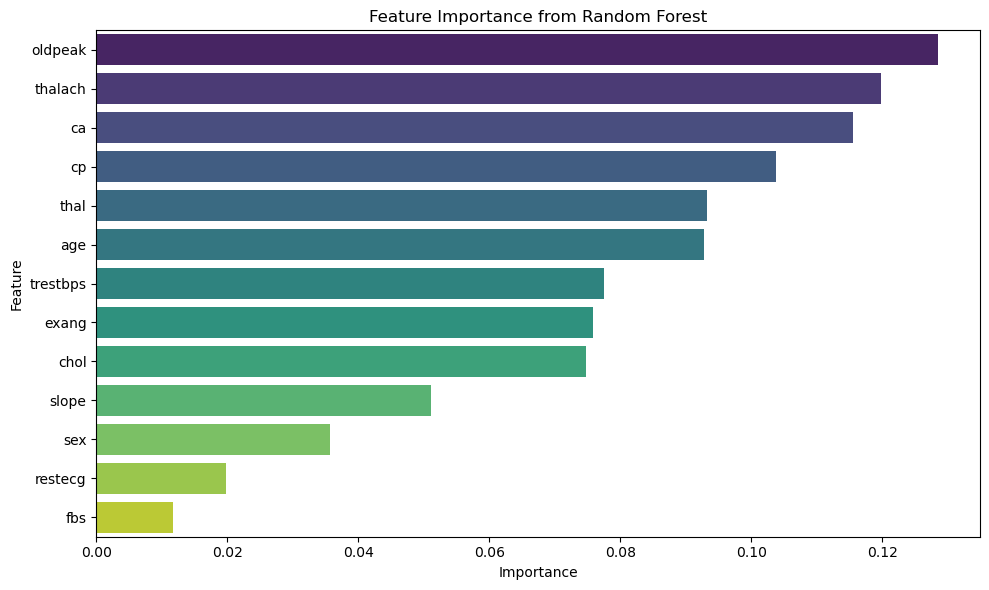

In [30]:
# Step 8: Feature Importance Visualization (Random Forest)
feature_importances = rf_model.feature_importances_
features = df.columns[:-1]
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()